<h1>
    <br style ="font-family:UCL-SoM-Outline;color:#EA7600"> UCL </br> 
    <br style="font-family:UCL-SoM-Solid; color:#002147;"> School of </br> 
    <br style="font-family:UCL-SoM-Solid; color:#002147;"> Management </br> 
    </p>
</h1>

<div class="image">

<h4>
          <p style="font-size:18pt">MSIN0143 Group Coursework Team H</p>
          <p style="font-size:18pt;font-family:UCL-SoM-Solid; color:#EA7600;">WeiBin Guo, Chi Chung Yuen, Zhuohao Li, Student 4, Student 5 </p> 
          <p style="font-size:18pt">Mobile Application Analytics </p>
 </h4>

</div>

# Apple Store dataset

# Summary

This dataset contains different factors that would affect the user ratings which we mainly focus on. After the initial analysis, we have assessed the validity of the data, discovered the relationship between variables and investigate the distribution of the individual variable. 

To further explore the dataset, we have conducted regression analysis to investigate if the length of APP name and APP description has a significant impact towards user ratings and performed a sentiment analysis to test the degree of subjectivity and polarity of APP descriptions. 

The results from these analyses are applied to prepare the data by data cleaning and engineering which enable the model testing on the effects of each variable has on user rating. This lead to a major finding that description subjectivity is the most important factor on user rating.

# 1. Business Objective

Our project is aimed to:

•	Analysing how factors such as price and genre for a mobile application helps increase its popularity and contributes to the overall user rating.

•	Providing statistical observations and deliver key and valuable insights to app developers for creating applications that fit the current market.


# 2. Getting the data

## 2.1 Install and import libraries and import the dataset

#### Install the required library for the sentiment analysis of the APP description

In [128]:
!pip install textblob

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Import relevant libraries 

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import scipy

from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics

import statsmodels.api as sm
from scipy.stats import pearsonr

from textblob import TextBlob

## 2.2 Data Preparation

#### Data Source

This dataset is obtained from Kaggle, containing two csv. files. One is about general information about app launched in App store and the other one is about the text descriptions of the apps.

In [130]:
data_desc = pd.read_csv('AppleStore.csv')
desp = pd.read_csv('appleStore_description.csv')

#### Dealing with raw data

We can merge the main dataset with the description dataset through the unique APP id

In [131]:
data = pd.merge(data_desc,desp,on='id',how='inner')

In [132]:
data.head()

,Unnamed: 0,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


# 3.Explore the data

## 3.1 Analyse each variabe type

In [133]:
data.dtypes

Unnamed: 0            int64
id                    int64
track_name_x         object
size_bytes_x          int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
track_name_y         object
size_bytes_y          int64
app_desc             object
dtype: object

This shows the type of each variable.

In [134]:
data.describe()

,Unnamed: 0,id,size_bytes_x,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_bytes_y
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7.197000e+03
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053,1.991345e+08
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066,3.592069e+08
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,5.898240e+05
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000,4.692275e+07
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000,9.715302e+07
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000,1.819249e+08
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000,4.025970e+09


The dependent variable in this analysis is the user_rating. According to this dataset summary, the user_rating has a value range from 0 to 5 and the average is about 3.52. Another interesting variable is the price, which has an average value of 1.72.

In [135]:
data.shape

(7197, 20)

And the dataset contains 7,197 rows (each row represents one APP) and there are, in total, 20 features available for analysis

## 3.2 Check missing values in the dataset 

In [136]:
data.isnull().mean() * 100

Unnamed: 0          0.0
id                  0.0
track_name_x        0.0
size_bytes_x        0.0
currency            0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
user_rating         0.0
user_rating_ver     0.0
ver                 0.0
cont_rating         0.0
prime_genre         0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
vpp_lic             0.0
track_name_y        0.0
size_bytes_y        0.0
app_desc            0.0
dtype: float64

No missing values are contained in this dataset and therefore, no pre-processing of the missing values are required for this dataset

## 3.3 Check outliers for each variable


In [137]:
def getoutliers(i):
    data_mean, data_std = np.mean(i), np.std(i)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in i if x < lower or x > upper]
    print('Identified outliers of' + ' ' + str(i.name) + ':%d' % len(outliers))

getoutliers(data['price'])
getoutliers(data['lang.num'])
getoutliers(data['size_bytes_x'])
getoutliers(data['rating_count_tot'])
getoutliers(data['user_rating_ver'])
getoutliers(data['user_rating'])
getoutliers(data['rating_count_ver'])
getoutliers(data['sup_devices.num'])

Identified outliers of price:49
Identified outliers of lang.num:199
Identified outliers of size_bytes_x:165
Identified outliers of rating_count_tot:80
Identified outliers of user_rating_ver:0
Identified outliers of user_rating:0
Identified outliers of rating_count_ver:34
Identified outliers of sup_devices.num:402


Outliers are found in this dataset for some variables. However, since they are all valid data, there is no need to remove these outliers. 

## 3.4 Correlation between each variables

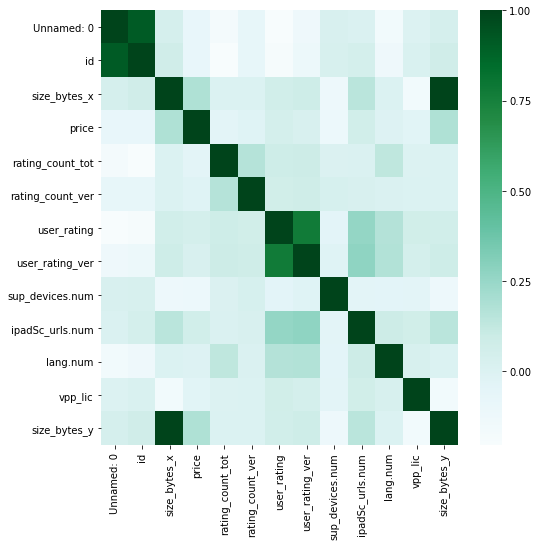

In [138]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap='BuGn')

In [139]:
data['user_rating'].corr(data['ipadSc_urls.num'])

0.26567135727082414

In [140]:
data['user_rating'].corr(data['lang.num'])

0.17097627663919113

From the table above, it shows the correlations between different variables, which helps us to identify possibly high correlation between variables. For example, it shows that there is correlation between user ratings and  ipadSc_urls.num. This shows that the number of screenshots showed on display are likely to affect the user ratings. Also, it shows that the number of languages the application support could also affect the user ratings. 

## 3.5 Check the distribution of the dependent and independent variables

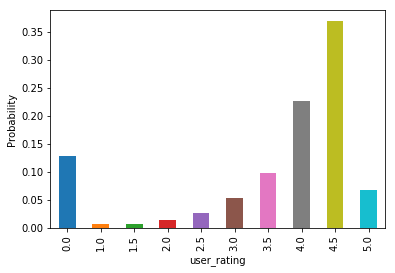

In [141]:
rating_sum = data['user_rating'].value_counts().sort_index(ascending=True).sum()
rating_prop = data['user_rating'].value_counts().sort_index(ascending=True)/rating_sum
ax = rating_prop.plot(kind='bar')
ax.set_xlabel('user_rating')
ax.set_ylabel('Probability')
plt.show()

With a default rating system, users are able to rate the app from 0.0 to 5.0. The above graph shows the distribution of the user rating of the apps in our dataset. Generally speaking, user ratings are slightly right-skewed, meaning that most apps have a high rating. The percentage grows step by step. The most popular rating is 4.5, but for 5.0, it falls a lot so we can say little apps can reach a full score. Another point worth nothing is that there are almost 12% of apps have a rating of zero, which might be new apps so not enough people are using or rating, or apps whose design or service are really bad. Their situations are a bit extreme so that it might be problematic if they are used in the model building stage.

<function matplotlib.pyplot.show(*args, **kw)>

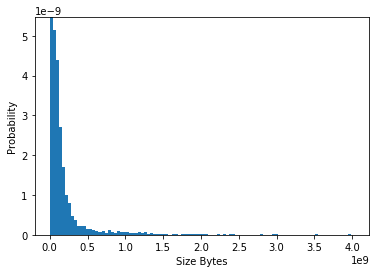

In [142]:
plt.hist(data['size_bytes_x'], bins=100, density=True)
plt.ylabel('Probability')
plt.xlabel('Size Bytes')
plt.show

The above graph shows the distribution of the size_byte variable, which is extremely left-skewed, meaning that most apps have a relatively small size while a small number of apps have a very large size. The skewness can be a problem in generating our model. Therefore, it is better to log the size byte variable and make it more normally distributed.

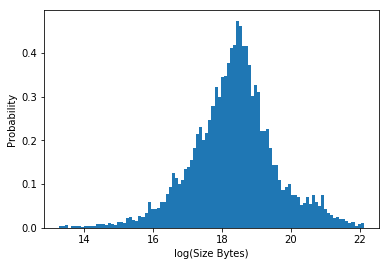

In [143]:
plt.hist(np.log(data['size_bytes_x']), bins=100, density=True)
plt.ylabel('Probability')
plt.xlabel('log(Size Bytes)')
plt.show()

After taking the log for the size, we are able to see that most are centered on 18, ranging from less than 14 to more than 22. The distribution looks normal and skewness is eliminated. 

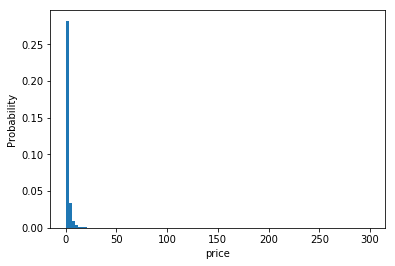

In [144]:
plt.hist(data['price'], bins=100, density=True)
plt.ylabel('Probability')
plt.xlabel('price')
plt.show()

For the apps in our dataset, price is rather low and has a little bit left skewness. We can say apps in the market nowdays charge less and many are even free. High priced apps are not popular. Unless it has great functions, it would be risky to price in the high level.

In [145]:
data[['track_name_x','price']].sort_values(by='price',ascending=False)[:10]

,track_name_x,price
1479,LAMP Words For Life,299.99
115,Proloquo2Go - Symbol-based AAC,249.99
2568,KNFB Reader,99.99
162,NAVIGON Europe,74.99
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99
1136,Articulation Station Pro,59.99
2181,Articulation Test Center Pro,59.99
5340,VPN Pro | Lifetime Proxy & Best VPN by Betternet,49.99
1688,Cubasis 2 - Mobile Music Creation System,49.99
778,プチ・ロワイヤル仏和辞典（第4版）・和仏辞典（第3版）,47.99


In [146]:
print('The average price is '+str(np.mean(data['price'])))
print('The 75% percentile of price is '+str(np.percentile(data['price'],75)))

The average price is 1.7262178685562626
The 75% percentile of price is 1.99


The above table shows the 10 most expensive APPs in this dataset. This suggests that some APPs are so expensive as compared to the majority of APPs. In fact, the average price is only 1.73 and the 75% pecentile is only 1.99. 

If we can remove some apps that are too expensive and then we can see count of paid apps is exponentially decreases as the price increases, which is shown below.

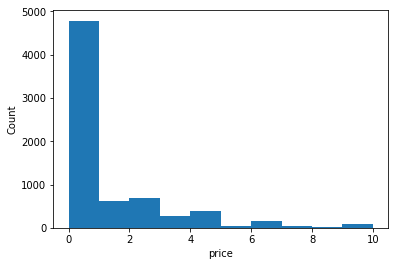

In [147]:
plt.hist(data['price'][data['price']<=10], bins=10)
plt.ylabel('Count')
plt.xlabel('price')
plt.show()

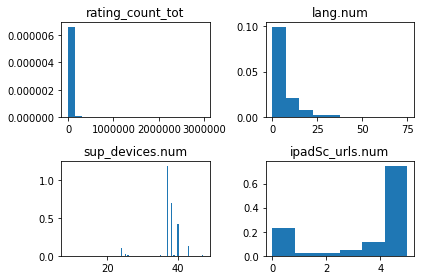

In [148]:
#n_bins = 10

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(data['rating_count_tot'], bins=20,density=True)
#ax0.legend(prop={'size': 10})
ax0.set_title('rating_count_tot')

ax1.hist(data['lang.num'], 10, density=True)
ax1.set_title('lang.num')

ax2.hist(data['sup_devices.num'], 100, density=True)
ax2.set_title('sup_devices.num')

# Make a multiple-histogram of data-sets with different length.
#x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(data['ipadSc_urls.num'], 6, density=True)
ax3.set_title('ipadSc_urls.num')

fig.tight_layout()
plt.show()

For the available language versions, it is a little bit left skewed, with more than half less than 20 kinds of languages. Little have more than 25 languages supported. The distribution is quite continuous.
For the total supported devices number, almost are able to operate on more than 38 devices. We are able to say that the applicabiity and generosity are quite important when developing apps because nowdays people are using different kinds of devices and each person have multiple ones. The distribution is a little bit right skewed.
For pictures posted on the app store, we can see that developers are divided in two types generally. One is less pictures and introductions, with 0 to 1 picutres, the other group is about 4 to 5 pictures and descriptions, which is more popular on the current market.


Similar to the size_byte variable, the price is also very left-skewed. The reason is that 56.36% of the app in this dataset is free, which shows as below.

In [149]:
from collections import Counter
price_count = Counter(data['price'].values)
print(str(price_count[0]/np.sum(list(price_count.values()))*100)+'%')

56.35681533972489%


Next, we are going to explore some categorical variables in the dataset. The dataset is made up of 23 genres, among which games type has more than 3500, more than half of the total objects. The second popular genre is entertainment, followed by education genre. We can assume that people are more interested in gaming and entertainment for recreation on Apps currently. Game and entertainment developers are facing fierce competition and new entries are facing both opportunities and threats. Then a certain number of people are focusing on getting education and knowledge through App. As we know there are quite a lot of usefull education apps in use like TED. By contrast, the share of apps in medical type is the least. Maybe people are not laying too much trust on medical media. It may remind medicine corporations that App Store should not be considered a favorable exploring platform for marketing campaign. 

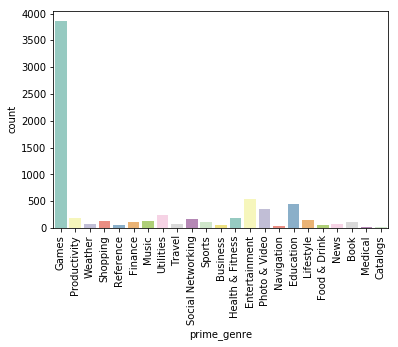

In [150]:
#sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x="prime_genre", data=data, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

When it comes to the average user rating for different genres, productivity is rated as the highest one, nearly 4.0. Music is also highly valued with a score of 4.0. Although games own the biggest share in the app market, the rating is just about 3.7. So there is room for improvement in Games Section. It is the same with Entertainment Section. The lowest average ratings lie on Book, Finance and Catalog.

In [151]:
cnt_srs = data[['prime_genre', 'user_rating']].groupby('prime_genre').mean()['user_rating'].sort_values(ascending=False)

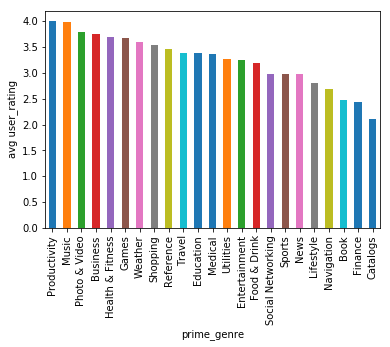

In [152]:
ax = cnt_srs.plot.bar()
ax.set_ylabel('avg user_rating')
plt.show()

The total number of rating for each content rating group is shown below. More than 4000 ratings are for games suitable for people older than 4, followed by 12+ and 9+ groups which have nearly 1000 ratings each. This is understandable because target customers for these groups are much more than those just for 17+. 

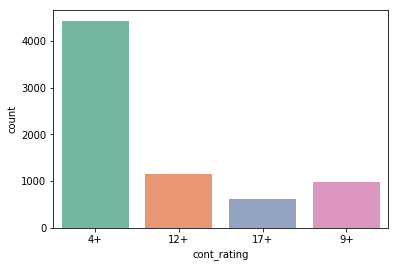

In [153]:
ax = sns.countplot(x="cont_rating", data=data, palette="Set2")
plt.show()

The user_rating for each content rating group is shown below. The "cont_rating" means that only those users older than the specified age can download the APP. For apps suitable for people younger than 17, the average ratings are similar, around 3.5. For those only available for people older than 17, the rate decreases to nearly 2.7.

In [154]:
cont_user = data[['cont_rating', 'user_rating']].groupby('cont_rating').mean()['user_rating'].sort_values(ascending=False)

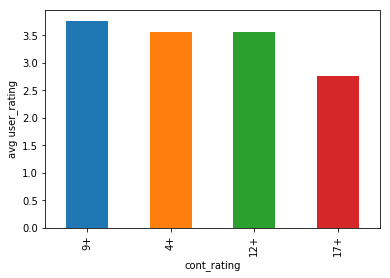

In [155]:
ax1 = cont_user.plot.bar()
ax1.set_ylabel('avg user_rating')
plt.show()

In [156]:
version_user = data[['ver', 'user_rating']].groupby('ver').mean()['user_rating'].sort_values(ascending=False)

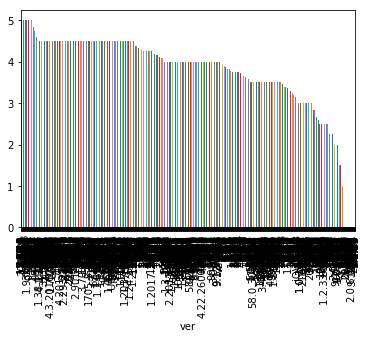

In [157]:
version_user.plot.bar()
plt.show()

In [158]:
len(data['ver'].unique())

1546

By visualising the average rating for different versions of APPs, we realise that the "ver" variable is very difficult to analyse since different APPs have different version codes and there are simply too many unique values (i.e. 1546) of this variable.

## 3.5 Difference between free and paid apps

#### Compare the rating of free and paid apps

Firstly, we can create a new column called "Free_App", which equals 1 if the price is 0.

In [159]:
def free_app(x):
    if x == 0:
        return 1
    else:
        return 0

data['Free_App'] = data['price'].apply(free_app)

And then we can check if there is any difference of average rating for free app and paid app

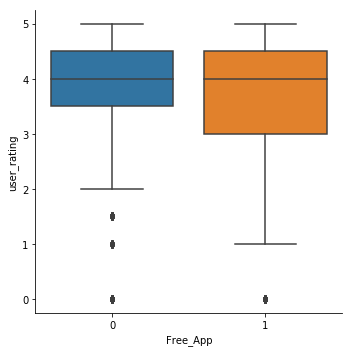

In [160]:
sns.catplot(x="Free_App", y="user_rating", kind="box", data=data)
plt.show()

According to the above box plot, it seems like there is no significance different between the user rating of free apps and paid apps, even though free apps seems to have a wide spread of rating than paid apps.

#### % of free and paid app in each category

In [161]:
genre_free_count = data[['prime_genre', 'Free_App']].groupby('prime_genre').sum().join(data[['prime_genre', 'Free_App']].groupby('prime_genre').count(),rsuffix='count')

In [162]:
genre_free_count['Prop'] = genre_free_count['Free_App']/genre_free_count['Free_Appcount']
genre_free_count = genre_free_count.sort_values(by='Prop',ascending=False)

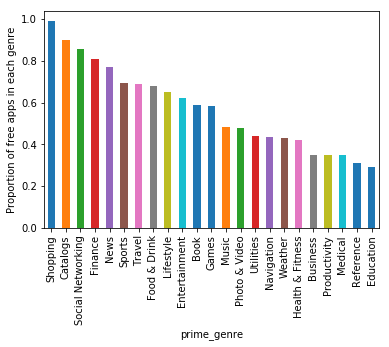

In [163]:
ax = genre_free_count['Prop'].plot.bar()
ax.set_ylabel('Proportion of free apps in each genre')
plt.show()

The above graph shows the proportion of free apps in each of the category and there is a huge difference between various categories.Almost every shopping APPs are free, which actually makes sense because customers are shopping in the APP so they don't need to pay for the APP itself. And some other categories such as catalogs and social network APPs have a very high proportion of free APPs. While some other categories such as education, reference and medical have very low proportion of free apps because they are providing valuable information inside the APPs. 

## 3.6 Analysing the length of the APP name and its description

We also try to explore whether the length of APP name and APP description would also have impact on the ratings of the APP, so we have defined a function to get the length of name and description, and we also check the correalation between the length of names and description and the user ratings. Finally, we ran the regression to check whether the correlation is significant in predicting the user rating. 

In [164]:
data['name_len'] = data['track_name_x'].apply(len)

In [165]:
pearsonr(data['user_rating'],data['name_len'])

(0.0811615859893802, 5.366220475421665e-12)

In [166]:
def get_len(x):
    a = len(x.split(' '))
    return a

data['desc_len'] = data['app_desc'].apply(get_len)

In [167]:
pearsonr(data['user_rating'],data['desc_len'])

(0.3609146417269984, 2.3455481455744387e-220)

In [168]:
X2 = sm.add_constant(np.array(data['desc_len']).reshape(-1,1))
desc = sm.OLS(np.array(data['user_rating']), X2)
desc2 = desc.fit()
print(desc2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1078.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):          2.35e-220
Time:                        20:54:30   Log-Likelihood:                -12713.
No. Observations:                7197   AIC:                         2.543e+04
Df Residuals:                    7195   BIC:                         2.544e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8060      0.028    101.721      0.0

The results of correlation coefficient shows some degree of correlation between length of description and user ratings, and the P-value of regression we ran above confirms that description length is significant in related to APP's user ratings. But the correlation between the length of name and average rating is not strong enough. 

## 3.7 Check the polarity and the subjectivity of the description

To take a step further, we would also perform a sentiment analysis to figure out the degree of subjectivity and polarity of APP descriptions. After that, we would also check the correlation of the subjectivity and polarity with user ratings and run a regression to see whether they are also significant in predicting user ratings. 

we have imported TexBlob library and defined the following function so that we can acqiure the defined the polarity and subjectivity of APP descriptions.

In [169]:
def get_polarity(x):
    polar = TextBlob(x).sentiment.polarity
    return polar

data['desc_polarity'] = data['app_desc'].apply(get_polarity)

In [170]:
pearsonr(data['user_rating'],data['desc_polarity'])

(0.277560408376859, 1.8841412101750775e-127)

In [171]:
def get_subject(x):
    subject = TextBlob(x).sentiment.subjectivity
    return subject

data['desc_subjectivity'] = data['app_desc'].apply(get_subject)

In [172]:
pearsonr(data['user_rating'],data['desc_subjectivity'])

(0.4903613405030686, 0.0)

The Pearson R shows that the subjectivity is more correlated with user ratings than polarity. We then ran another regression below and the P-value also shows that it is significant in predicting APP user ratings. 

In [173]:
X2 = sm.add_constant(data[['desc_subjectivity','desc_polarity']])
sent = sm.OLS(np.array(data['user_rating']), X2)
sent2 = sent.fit()
print(sent2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     1139.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:55:05   Log-Likelihood:                -12226.
No. Observations:                7197   AIC:                         2.446e+04
Df Residuals:                    7194   BIC:                         2.448e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9005      0.03

The above regression result shows that when using both the polarity and subjectivity in the linear regression to predict the average rating, the polarity becomes insignificant becuase it has a large p-value, it suggests that polarity and subjectivity are largely containing similar information and we should only keep subjectivity in the regression.

# 4. Prepare the data

## 4.1 Convert categorical variables into dummy variables

In [174]:
data_genre = pd.get_dummies(data['prime_genre'])

In [175]:
data_cont = pd.get_dummies(data['cont_rating'])

In [176]:
data_join = data_genre.join(data_cont)

In [177]:
data_dummy = data.join(data_join)

In [178]:
data_dummy.columns

Index(['Unnamed: 0', 'id', 'track_name_x', 'size_bytes_x', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic',
       'track_name_y', 'size_bytes_y', 'app_desc', 'Free_App', 'name_len',
       'desc_len', 'desc_polarity', 'desc_subjectivity', 'Book', 'Business',
       'Catalogs', 'Education', 'Entertainment', 'Finance', 'Food & Drink',
       'Games', 'Health & Fitness', 'Lifestyle', 'Medical', 'Music',
       'Navigation', 'News', 'Photo & Video', 'Productivity', 'Reference',
       'Shopping', 'Social Networking', 'Sports', 'Travel', 'Utilities',
       'Weather', '12+', '17+', '4+', '9+'],
      dtype='object')

## 4.2 Apply log to size variable

In [179]:
data['log_size'] =  pd.np.log(data['size_bytes_x'])

As mentioned before, we need to log the size of APP because it is extremely left-skwed.

## 4.3 Dropping not useful columns

In [84]:
data_dropped = data_dummy.drop(['Unnamed: 0','id','track_name_x','currency','rating_count_ver','user_rating_ver','ver','cont_rating',
                 'prime_genre','vpp_lic','track_name_y', 'size_bytes_y', 'app_desc','desc_polarity','name_len'],axis=1)

## 4.4 Split the data into training and validation groups

In [180]:
Y = data_dropped['user_rating']

In [181]:
X = data_dropped.drop(['user_rating'],axis = 1)

In [182]:
X.head()

,size_bytes_x,price,rating_count_tot,sup_devices.num,ipadSc_urls.num,lang.num,Free_App,desc_len,desc_subjectivity,Book,...,Shopping,Social Networking,Sports,Travel,Utilities,Weather,12+,17+,4+,9+
0,100788224,3.99,21292,38,5,10,0,252,0.419027,0,...,0,0,0,0,0,0,0,0,1,0
1,158578688,0.00,161065,37,5,23,1,572,0.445654,0,...,0,0,0,0,0,0,0,0,1,0
2,100524032,0.00,188583,37,5,3,1,288,0.491667,0,...,0,0,0,0,0,1,0,0,1,0
3,128512000,0.00,262241,37,5,9,1,638,0.541512,0,...,1,0,0,0,0,0,1,0,0,0
4,92774400,0.00,985920,37,5,45,1,452,0.533908,0,...,0,0,0,0,0,0,0,0,1,0


In [183]:
X.shape

(7197, 36)

The preprocessed dataset contains 36 independent variables that can be used to predict the average rating of APPs.

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5757, 36)
(1440, 36)


Using the sklearn library, we can split the preprocessed dataset into a training set with 80% of data and a test set with 20% of data.

# 5. Model building

## 5.1 Build the linear regression model using the training set

In [185]:
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train, X1)
ols_fit = ols.fit()
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     75.04
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:55:25   Log-Likelihood:                -9554.5
No. Observations:                5757   AIC:                         1.918e+04
Df Residuals:                    5722   BIC:                         1.941e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4104      0.14

As shown in the linear regression result, the model on the training set achieve an adjusted R-squared of about 30% and the most important variable in this regression is clearly the "desc_subjectivity" with the highest coefficient and a p-value of 0.

#### This is a very important finding for this project. The importance of description subjectivity in predicting average rating an APP suggests that APP developers should focus on writing more subjective description of their APPs, which might make the APPs more attractive to their potential customers and increases their rating. 

According to the final result run by the model, desc_subjectivity is the most influential independent variable among with a p-value of 0.000. It can be said that the subjectivity of reviews have large impact on rating at a significant level of 0.01%. The relation is positive, with the subjectivity increasing 1 unit, the rating increasing 2.699. The insight here is how customers perceive text descriptions are important. Firstly, developers should give non-biased, subjective descriptions for their own products, without being too aggressive. Secondly, it is useful to pay attention to customer psychological and mental attributes in the particular targeted segments in order to come up with subjective descriptions. Differnt customers have differnt definations about subjectivity. Only by designing a perfect app is far away from popularity and trend. How to convey the accurate messages to potential customers is also important in the post period.

The second important indicator is numbers of description. More descriptions can lead to a higher rating. One unit increase in the number of image description can lead to increase in rating by 0.1043, at a significant level of 99.9%. This is intuitive. Potential customers love to know more about apps theme, function, instructions, interface in details before deciding to download. More exposure bring up customers’ confidence and show developers’ commitment and devotion. Controlling others, a recommendation about more descriptions on the app store can be given to developers at the aim of improving rating scores. Regarding to current project, improvements can be made by integrating with more data about how the introduction is made, which aspect is displayed, any incentive point.

Turning to p-value, size, price and free-app are not significant as their p-values exceed 10%. The hypotheses about they make no difference on ratings are retained based on this dataset. Possible explanations are come up: Maybe with increasing income and willingness to spend more on apps, dependence on electronic devices, people do not care about higher price, which cannot be an obstacle of evaluating apps. They will not dislike an app just because of high price. Customers accept reasonable price because of good experience brought by apps. The same is with size. Maybe more people have large storage and faster running speed on their devices compared with past. There is no need to reject an app and its function only because of large size. For developers, price and size should be given less attention. The quality and function should be prioritized.

## 5.2 Test the model on the test set

In [186]:
X_test = sm.add_constant(X_test)
y_predict = ols_fit.predict(X_test)

In [187]:
sklearn.metrics.mean_squared_error(y_test, y_predict)

1.4643639859611928

In [188]:
sklearn.metrics.r2_score(y_test, y_predict)

0.3212234964711608

The above model performance measurement shows that the linear regression model on the testing test achieve a mean squared error of 1.46 and a R-squared of 32%, which is even higher than the training set R-squared. This suggests that no over-fitting problem in this model

# 6. Reflection


## 6.1 Solution

The solutions we provided have met the business objectives. Since we have analysed the effects of each factor which enabled the delivery of key information on the contribution towards user rating. Also, by applying statistical analyses, we have identified key findings for app developers to improve their current applications and also creating future applications that are suitable for the markets 

## 6.2 Assumptions

1. We assumed that this dataset could represent the mobile application market
2. We assumed the dataset does not have time effect

## 6.3 Limitations

1. There are only limited variables included in the dataset and some of them are unable to interpret such as track_name and vpp_lic

2. We did not take into the account other external factors such as economic situations and trend of application selections

3. This dataset only focus on IOS store which Andriod applications could have different results compare to these analyses

4. The total number of observations is relatively small which further improvements could be made by collecting more data as well as combining more dataset 